In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import missingno as msno

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots


In [2]:
df = pd.read_csv('patient_data_edited.csv')
pd.set_option('display.max_rows', None)

df.head().style.background_gradient(cmap='Greens')

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomiting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,35,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0
1,77,1,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0
2,46,0,0,1,0,0,1,1,1,0,1,1,0,1,1,1,0,0
3,59,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0
4,32,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1000 non-null   int64
 1   sex             1000 non-null   int64
 2   fever           1000 non-null   int64
 3   cold            1000 non-null   int64
 4   rigor           1000 non-null   int64
 5   fatigue         1000 non-null   int64
 6   headace         1000 non-null   int64
 7   bitter_tongue   1000 non-null   int64
 8   vomiting        1000 non-null   int64
 9   diarrhea        1000 non-null   int64
 10  Convulsion      1000 non-null   int64
 11  Anemia          1000 non-null   int64
 12  jundice         1000 non-null   int64
 13  cocacola_urine  1000 non-null   int64
 14  hypoglycemia    1000 non-null   int64
 15  prostraction    1000 non-null   int64
 16  hyperpyrexia    1000 non-null   int64
 17  severe_maleria  1000 non-null   int64
dtypes: int64(18)
memory usage: 14

In [4]:
df.describe().style.background_gradient(cmap='Greens')

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomiting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.455000,0.504000,0.483000,0.535000,0.508000,0.520000,0.500000,0.513000,0.485000,0.475000,0.510000,0.543000,0.481000,0.489000,0.498000,0.496000,0.481000,0.200000
std,17.839625,0.500234,0.499961,0.499023,0.500186,0.499850,0.500250,0.500081,0.500025,0.499624,0.500150,0.498397,0.499889,0.500129,0.500246,0.500234,0.499889,0.400200
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

age               0
sex               0
fever             0
cold              0
rigor             0
fatigue           0
headace           0
bitter_tongue     0
vomiting          0
diarrhea          0
Convulsion        0
Anemia            0
jundice           0
cocacola_urine    0
hypoglycemia      0
prostraction      0
hyperpyrexia      0
severe_maleria    0
dtype: int64

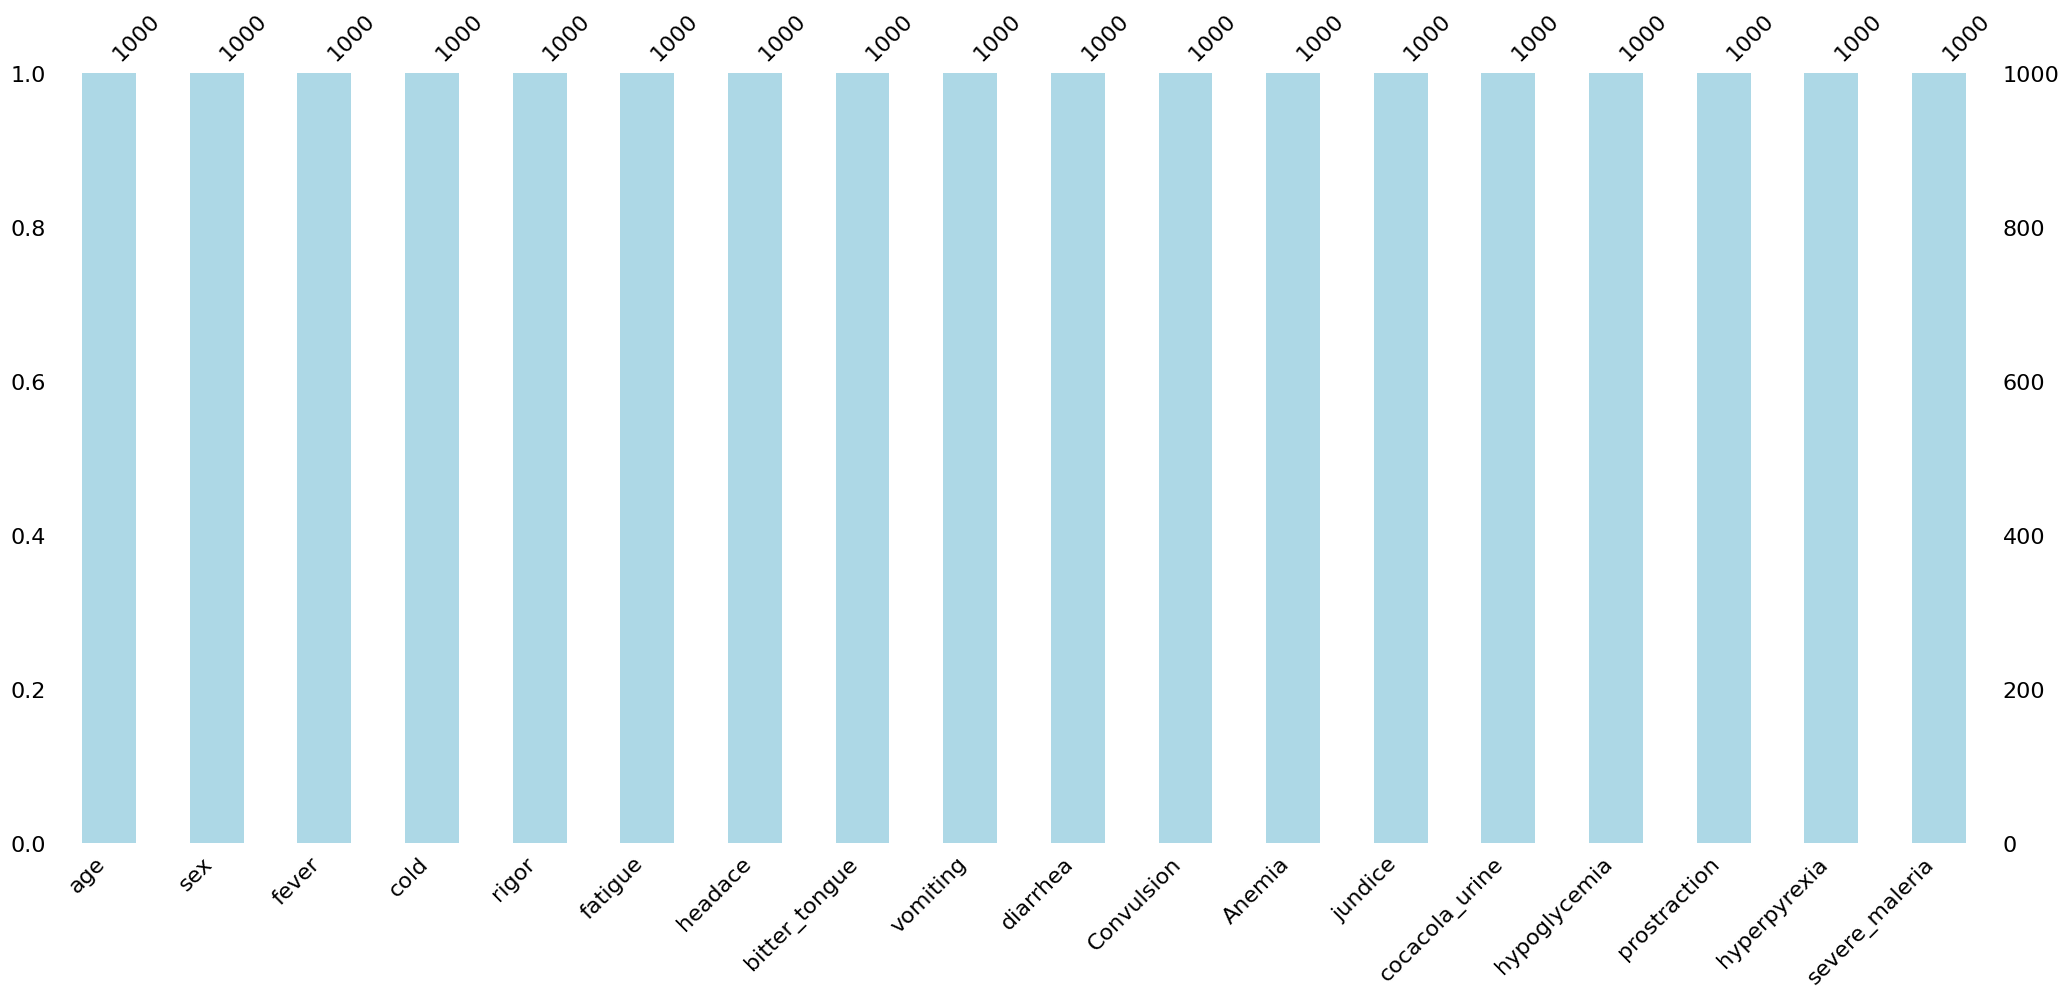

In [6]:
missing = msno.bar(df, color='lightblue')

In [7]:
df.duplicated().value_counts()

False    1000
dtype: int64

In [8]:
df.columns.values

array(['age', 'sex', 'fever', 'cold', 'rigor', 'fatigue', 'headace',
       'bitter_tongue', 'vomiting', 'diarrhea', 'Convulsion', 'Anemia',
       'jundice', 'cocacola_urine', 'hypoglycemia', 'prostraction',
       'hyperpyrexia', 'severe_maleria'], dtype=object)

In [9]:
df.age.mode()

0    35
dtype: int64

In [10]:
df.fever.mode()

0    0
dtype: int64

<a id="outliers"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Vizualisation</p>

**1. Demographic Analysis**
- What is the age distribution of the patients?
- Is there a correlation between age and severe malaria?

In [11]:
df.age.value_counts().head(10)

35    26
22    25
61    23
65    22
70    22
63    21
53    21
74    21
73    20
39    20
Name: age, dtype: int64

Text(0, 0.5, 'count')

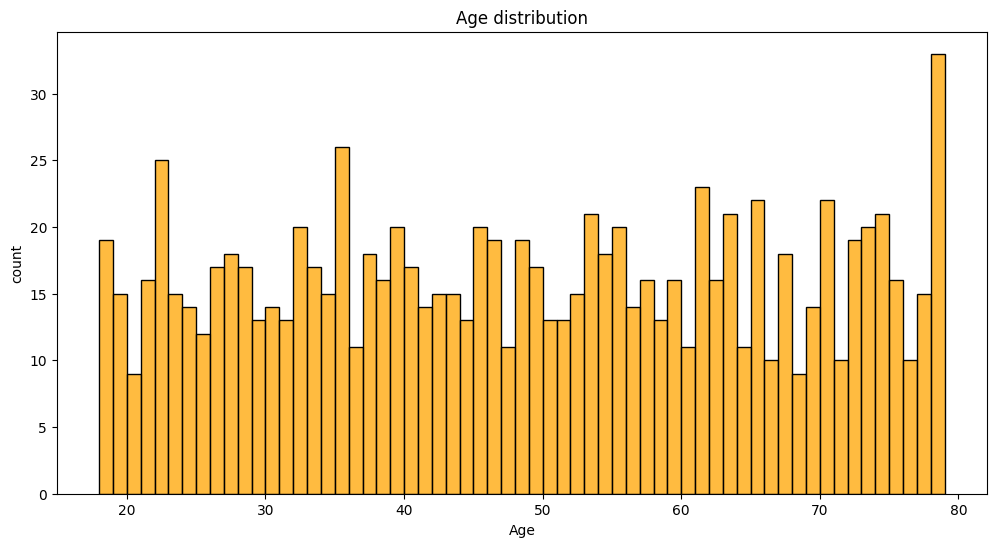

In [12]:
fig = plt.figure(figsize=(12, 6))

sns.histplot(df.age, bins=np.arange(18,80), color='orange');
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('count')

#### Conclusion

The dataset reveals that malaria affects a broad range of age groups relatively evenly, with some peaks in specific ages. This suggests that interventions and awareness campaigns should target a wide demographic rather than focusing solely on specific age groups. However, identifying the reasons behind the higher incidences in certain ages could help refine these efforts for better effectiveness.

In [13]:
df.columns

Index(['age', 'sex', 'fever', 'cold', 'rigor', 'fatigue', 'headace',
       'bitter_tongue', 'vomiting', 'diarrhea', 'Convulsion', 'Anemia',
       'jundice', 'cocacola_urine', 'hypoglycemia', 'prostraction',
       'hyperpyrexia', 'severe_maleria'],
      dtype='object')

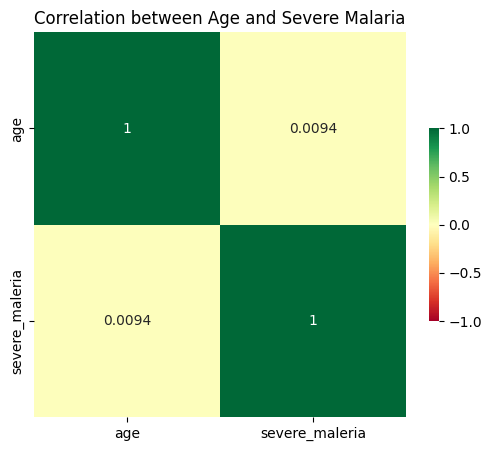

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'age' and 'severe_malaria' are columns in your dataframe 'df'
correlation_matrix = df[['age', 'severe_maleria']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, center=0, 
            cbar_kws={'shrink': .5})
plt.title('Correlation between Age and Severe Malaria')
plt.show()


In [15]:
correlation_value = df['age'].corr(df['severe_maleria'])
print(f"Correlation between age and severe malaria: {correlation_value}")


Correlation between age and severe malaria: 0.00939390884052072


#### Summary
In summary, there is no meaningful linear relationship between age and severe malaria in your dataset. This finding suggests that age is not a determining factor for the severity of malaria in this population, prompting a need to investigate other potential factors that might influence the severity of the disease.

In [19]:
!jupyter nbconvert --to pdf Malaria_Patients.ipynb


[NbConvertApp] Converting notebook Malaria_Patients.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'Malaria_Patients.ipynb'
Traceback (most recent call last):
  File "C:\Users\nelio\anaconda3\envs\nelio\lib\site-packages\nbconvert\nbconvertapp.py", line 435, in export_single_notebook
    output, resources = self.exporter.from_filename(notebook_filename, resources=resources)
  File "C:\Users\nelio\anaconda3\envs\nelio\lib\site-packages\nbconvert\exporters\exporter.py", line 190, in from_filename
    return self.from_file(f, resources=resources, **kw)
  File "C:\Users\nelio\anaconda3\envs\nelio\lib\site-packages\nbconvert\exporters\exporter.py", line 208, in from_file
    return self.from_notebook_node(nbformat.read(file_stream, as_version=4), resources=resources, **kw)
  File "C:\Users\nelio\anaconda3\envs\nelio\lib\site-packages\nbconvert\exporters\pdf.py", line 169, in from_notebook_node
    nb, resources=resources, **kw
  File "C:\Users\nelio\anaconda3\envs\nelio\lib\site

In [17]:
!pip install pandoc